In [1]:
from commpy.utilities  import upsample
from commpy.utilities  import signal_power
from commpy.filters    import rrcosfilter
from scipy.signal      import lfilter as firFilter
from numpy.random import randint
from numpy.random import randn
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import interpolate
from scipy.special import erfc
from scipy import special as sp

In [2]:
def mapping_tab(mu):
    if mu == 2:
        mapping_table = {
            (0,0) : -1 - 1j,     (0,1) : -1 + 1j,      (1,1) : 1 + 1j,     (1,0) : 1 - 1j          
        }
    elif mu == 4:
        mapping_table = {
            (0,0,0,0) : -3-3j,    (0,0,0,1) : -3-1j,    (0,0,1,0) : -3+3j,    (0,0,1,1) : -3+1j,    (0,1,0,0) : -1-3j,
            (0,1,0,1) : -1-1j,    (0,1,1,0) : -1+3j,    (0,1,1,1) : -1+1j,    (1,0,0,0) :  3-3j,    (1,0,0,1) :  3-1j,
            (1,0,1,0) :  3+3j,    (1,0,1,1) :  3+1j,    (1,1,0,0) :  1-3j,    (1,1,0,1) :  1-1j,    (1,1,1,0) :  1+3j,
            (1,1,1,1) :  1+1j
        }
    elif mu == 6:
        mapping_table = {
            (0,0,0,0,0,0) : 7 + 7j,    (0,0,0,0,0,1) : 7 + 5j,    (0,0,0,0,1,0) : 5 + 7j,    (0,0,0,0,1,1) : 5 + 5j,
            (0,0,0,1,0,0) : 7 + 1j,    (0,0,0,1,0,1) : 7 + 3j,    (0,0,0,1,1,0) : 5 + 1j,    (0,0,0,1,1,1) : 5 + 3j,
            (0,0,1,0,0,0) : 1 + 7j,    (0,0,1,0,0,1) : 1 + 5j,    (0,0,1,0,1,0) : 3 + 7j,    (0,0,1,0,1,1) : 3 + 5j,
            (0,0,1,1,0,0) : 1 + 1j,    (0,0,1,1,0,1) : 1 + 3j,    (0,0,1,1,1,0) : 3 + 1j,    (0,0,1,1,1,1) : 3 + 3j,
            (0,1,0,0,0,0) : 7 - 7j,    (0,1,0,0,0,1) : 7 - 5j,    (0,1,0,0,1,0) : 5 - 7j,    (0,1,0,0,1,1) : 5 - 5j,
            (0,1,0,1,0,0) : 7 - 1j,    (0,1,0,1,0,1) : 7 - 3j,    (0,1,0,1,1,0) : 5 - 1j,    (0,1,0,1,1,1) : 5 - 3j,
            (0,1,1,0,0,0) : 1 - 7j,    (0,1,1,0,0,1) : 1 - 5j,    (0,1,1,0,1,0) : 3 - 7j,    (0,1,1,0,1,1) : 3 - 5j,
            (0,1,1,1,0,0) : 1 - 1j,    (0,1,1,1,0,1) : 1 - 3j,    (0,1,1,1,1,0) : 3 - 1j,    (0,1,1,1,1,1) : 3 - 3j,
            (1,0,0,0,0,0) : -7 + 7j,    (1,0,0,0,0,1) : -7 + 5j,    (1,0,0,0,1,0) : -5 + 7j,    (1,0,0,0,1,1) : -5 + 5j,
            (1,0,0,1,0,0) : -7 + 1j,    (1,0,0,1,0,1) : -7 + 3j,    (1,0,0,1,1,0) : -5 + 1j,    (1,0,0,1,1,1) : -5 + 3j,
            (1,0,1,0,0,0) : -1 + 7j,    (1,0,1,0,0,1) : -1 + 5j,    (1,0,1,0,1,0) : -3 + 7j,    (1,0,1,0,1,1) : -3 + 5j,
            (1,0,1,1,0,0) : -1 + 1j,    (1,0,1,1,0,1) : -1 + 3j,    (1,0,1,1,1,0) : -3 + 1j,    (1,0,1,1,1,1) : -3 + 3j,
            (1,1,0,0,0,0) : -7 - 7j,    (1,1,0,0,0,1) : -7 - 5j,    (1,1,0,0,1,0) : -5 - 7j,    (1,1,0,0,1,1) : -5 - 5j,
            (1,1,0,1,0,0) : -7 - 1j,    (1,1,0,1,0,1) : -7 - 3j,    (1,1,0,1,1,0) : -5 - 1j,    (1,1,0,1,1,1) : -5 - 3j,
            (1,1,1,0,0,0) : -1 - 7j,    (1,1,1,0,0,1) : -1 - 5j,    (1,1,1,0,1,0) : -3 - 7j,    (1,1,1,0,1,1) : -3 - 5j,
            (1,1,1,1,0,0) : -1 - 1j,    (1,1,1,1,0,1) : -1 - 3j,    (1,1,1,1,1,0) : -3 - 1j,    (1,1,1,1,1,1) : -3 - 3j,
    
        }
        
    return mapping_table



def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])



def OFDM_symbol(QAM_payload, K, pilotValue):
    symbol = np.zeros(K, dtype = complex) # todas as K subportadoras
    symbol[pilotCarriers] = pilotValue  # aloca as subportadoras piloto 
    symbol[dataCarriers] = QAM_payload  # aloca as subportadoras de dados
    return symbol



def IDFT(OFDM_data):
    return np.fft.ifft(np.sqrt(len(OFDM_data))*OFDM_data)



def addCP(OFDM_time, CP):
    cp = OFDM_time[-CP:]               # pega as últimas amostras do CP ...
    return np.hstack([cp, OFDM_time])  # ... e as adiciona no início dos dados



def channel(signal, type_channel, snr, M, SpS): 

    if type_channel == 'awgn':
        
        snrdB    = snr + 10*np.log10(np.log2(M)) # snrdB é a relação entre Es/N0
        avg_energy = sum(abs(signal)**2) / (len(signal)) # potência média do sinal transmitido
                
        N0       = SpS*avg_energy/(10**(snrdB/10)) # variância do ruído
        σ        = np.sqrt(N0) # variância dividida por dois pois o vetor de entrada é complexo        

        noise    = np.random.normal(0, σ, len(signal)) + 1j*np.random.normal(0, σ, len(signal))
        noise    = (1/np.sqrt(np.pi)) * noise
        return signal + noise
    
    


def removeCP(signal, CP):
    return signal[CP:len(signal)]



def DFT(OFDM_RX):
    return np.fft.fft(np.sqrt(len(OFDM_data))*OFDM_RX)



def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  #  extrair os valores piloto do sinal RX
    Hest_at_pilots = pilots / pilotValue # divide pelo valor do piloto transmitido
    
    # Interpolação entre as portadoras piloto para realizar a estimação do canal nas portadoras de dados
    Hest_abs = interp1d(pilotCarriers, abs(Hest_at_pilots), kind = 'linear')(allCarriers)
    Hest_phase = interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind = 'linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j * Hest_phase)
    
#     plt.plot(allCarriers, abs(H_exact), label = 'Canal correto')
#     plt.stem(pilotCarriers, abs(Hest_at_pilots), label = 'Estimativas piloto')
#     plt.plot(allCarriers, abs(Hest), label = 'Canal estimado via interpolação')
#     plt.grid(True); plt.xlabel('índice da portadora'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
#     plt.ylim(0,2)
    
    return Hest



def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest



def get_payload(equalized): # apenas os símbolos OFDM de portadoras de dados
    return equalized[dataCarriers]



def Demapping(QAM_est):
    # pontos da constelação
    constellation = np.array([x for x in demapping_table.keys()])
    
    # calcula a distância entre cada ponto recebido
    dists = abs(QAM_est.reshape((-1,1)) - constellation.reshape((1,-1)))
    
    # para cada elemento no QAM, escolher o índice na constelação
    # que pertence ao ponto de constelação mais próximo        
    const_index = dists.argmin(axis=1) # argmin(axis = 1) porque vai pegar o índice do menor valor em cada linha

    # obter de volta o ponto real da constelação    
    hardDecision = constellation[const_index]

    # converte o símbolo da constelação em sequência de bits
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision



def Qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

def theoryBER_MQAM(M, EbN0):
    
    EbN0lin = 10**(EbN0/10)    
    L  = np.sqrt(M)
    Pb = 2*(1-1/L)/np.log2(L)*Qfunc(np.sqrt(3*np.log2(L)/(L**2-1)*(2*EbN0lin)))
    
    return Pb

In [3]:
number_of_datasymbols = 2**15 # número de símbolos QAM gerados
mu = 6 # quantidade de bits/símbolo
M = 2**mu # quantidade de pontos da constelação M-QAM
SpS = 1 #taxa de amostragem amostras/símbolo

K = 256 # número de subportadoras
CP = K//4 # comprimento do prefixo cíclico
P = 8 # número de portadora piloto 

number_of_OFDMsymbols = number_of_datasymbols//K # número de símbolos OFDM a serem transmitidos
payloadBits = mu * number_of_datasymbols # quantidade total de bits gerados

allCarriers = np.arange(K)  # índices das subportadoras ([0, 1, ... K-1])

#         Portadoras piloto a cada K/P portadora
pilotCarriers = allCarriers[::K//P]
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

#     4-QAM : pilotValue = FALTA DETERMINAR
#     16-QAM: pilotValue = 3.172
#     64-QAM: pilotValue = 6.48
pilotValue = 6.48 # O valor das portadoras piloto

dataCarriers = np.delete(allCarriers, pilotCarriers) # portadora de informação
payloadBits_per_OFDMsymbol = len(dataCarriers) * mu # quantidade de bits de informação transmitido por símbolo OFDM

mapping_table = mapping_tab(mu) # mapeamento dos bits nos símbolos QAM
demapping_table = {v : k for k, v in mapping_table.items()} # Demapeamento dos símbolos QAM nos bits correspondentes

EbN0dB_ = np.arange(1,20.5,0.5)+5
BER     = np.zeros(EbN0dB_.shape)

for indSNR in range(EbN0dB_.size):
    OFDM_TX = []
    OFDM_RX_noCP = []
    bits = []
    bits_est = []
    EbN0dB = EbN0dB_[indSNR]
    
    for ofdm_symbol in range(number_of_OFDMsymbols):
        
        OFDM_TX.append([])
        bits.append([])
        bits_load = np.random.randint(2, size = payloadBits_per_OFDMsymbol) 
        bits_SP = bits_load.reshape(len(dataCarriers), mu) # paralelização da sequência de bits
        bits[ofdm_symbol] = bits_load

        QAM = Mapping(bits_SP)
        OFDM_data = OFDM_symbol(QAM, K, pilotValue) # associação dos símbolos QAM com as portadoras
                
        OFDM_time = IDFT(OFDM_data)

        OFDM_withCP = addCP(OFDM_time, CP)

        OFDM_TX[ofdm_symbol] = OFDM_withCP
        OFDM_TX_ps = np.array(OFDM_TX)
        OFDM_TX_serial = OFDM_TX_ps.reshape((-1,))
            
#         canal AWGN
    OFDM_RX = channel(OFDM_TX_serial, 'awgn', EbN0dB, M = 64, SpS = 1)        
    OFDM_RX_paralelo = OFDM_RX.reshape(number_of_OFDMsymbols, K+CP) # paralelização da sequência de bits

    
    for ofdm_symbol in range(number_of_OFDMsymbols):
        OFDM_RX_noCP.append([])
        bits_est.append([])

        OFDM_RX_noCP[ofdm_symbol] = removeCP(OFDM_RX_paralelo[ofdm_symbol], CP)
        OFDM_demod = DFT(OFDM_RX_noCP[ofdm_symbol])

#         plt.figure(2)
#         plt.plot(OFDM_demod.real, OFDM_demod.imag,'.',color = 'red');
#         plt.xlabel('real');
#         plt.ylabel('imag');

        Hest = channelEstimate(OFDM_demod)
        equalized_Hest = equalize(OFDM_demod, Hest)
        QAM_est = get_payload(equalized_Hest)

#         plt.figure(3)
#         plt.plot(QAM_est.real, QAM_est.imag,'.',color = 'red');
#         plt.xlabel('real');
#         plt.ylabel('imag');
#         plt.title("Símbolos da constelação 64-QAM estimados no receptor do sistema.")

        PS_est, hardDecision = Demapping(QAM_est)
        bits_est[ofdm_symbol] = PS_est.reshape((-1,))
    
#     Cálculo da taxa de erro por bit
    ERR = np.logical_xor(bits, bits_est)
    BER[indSNR] = BER[indSNR] + ERR.sum()/ERR.size
    print('EbN0: %3.2f, BER: %3.1e ' %(EbN0dB, BER[indSNR]))
    OFDM_TX = OFDM_TX.clear()
    OFDM_RX_noCP = OFDM_RX_noCP.clear()
    bits = bits.clear()
    bits_est = bits_est.clear()

EbN0: 6.00, BER: 8.2e-02 
EbN0: 6.50, BER: 7.5e-02 
EbN0: 7.00, BER: 6.7e-02 
EbN0: 7.50, BER: 5.9e-02 
EbN0: 8.00, BER: 5.2e-02 
EbN0: 8.50, BER: 4.5e-02 
EbN0: 9.00, BER: 3.9e-02 
EbN0: 9.50, BER: 3.3e-02 
EbN0: 10.00, BER: 2.7e-02 
EbN0: 10.50, BER: 2.2e-02 
EbN0: 11.00, BER: 1.8e-02 
EbN0: 11.50, BER: 1.4e-02 
EbN0: 12.00, BER: 1.0e-02 
EbN0: 12.50, BER: 8.0e-03 
EbN0: 13.00, BER: 6.2e-03 
EbN0: 13.50, BER: 4.1e-03 
EbN0: 14.00, BER: 3.0e-03 
EbN0: 14.50, BER: 1.6e-03 
EbN0: 15.00, BER: 1.3e-03 
EbN0: 15.50, BER: 6.4e-04 
EbN0: 16.00, BER: 3.6e-04 
EbN0: 16.50, BER: 3.1e-04 
EbN0: 17.00, BER: 1.3e-04 
EbN0: 17.50, BER: 5.3e-05 
EbN0: 18.00, BER: 2.6e-05 
EbN0: 18.50, BER: 2.1e-05 
EbN0: 19.00, BER: 0.0e+00 
EbN0: 19.50, BER: 0.0e+00 
EbN0: 20.00, BER: 0.0e+00 
EbN0: 20.50, BER: 0.0e+00 
EbN0: 21.00, BER: 0.0e+00 
EbN0: 21.50, BER: 0.0e+00 
EbN0: 22.00, BER: 0.0e+00 
EbN0: 22.50, BER: 0.0e+00 
EbN0: 23.00, BER: 0.0e+00 
EbN0: 23.50, BER: 0.0e+00 
EbN0: 24.00, BER: 0.0e+00 
EbN0: 24.

<ipython-input-4-3bc9ada87198>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(EbN0dB_,np.log10(BER),'*');
<ipython-input-4-3bc9ada87198>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(EbN0dB_, np.log10(BERtheory))


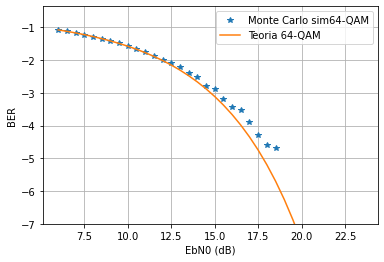

In [4]:
BERtheory = theoryBER_MQAM(M, EbN0dB_)

plt.plot(EbN0dB_,np.log10(BER),'*');
plt.plot(EbN0dB_, np.log10(BERtheory))
plt.legend(['Monte Carlo sim' + str(M) +  '-QAM', "Teoria "+ str(M) + "-QAM"])
plt.xlabel('EbN0 (dB)');
plt.ylabel('BER');
plt.ylim(-7)
plt.grid()